In [1]:
# !pip install --upgrade numpy

In [2]:
!pip install eli5

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.stats.stats import kendalltau
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import log_loss
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import LSTM, Masking
from tensorflow.keras.layers import MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import activations
sns.set()

# Loading data

In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *


# # use this for holdout 25/75 >>>>>>>>>>>>>>>.
train_values = np.empty(shape=[0, 222])
test_values = np.empty(shape=[0, 222])

#train_sampled_all = glob.glob('./drive/MyDrive/compsci/train_sampled_all_220.csv')
#test_unsampled_all = glob.glob('./drive/MyDrive/compsci/test_unsampled_all_220.csv')

train_sampled_all = glob.glob('C:/Users/Asus/Desktop/colab/train_sampled_all_220.csv')
test_unsampled_all = glob.glob('C:/Users/Asus/Desktop/colab/test_unsampled_all_220.csv')

#train_sampled_all = glob.glob('C:/Users/Asus/Desktop/colab/train_patients.csv')
#test_unsampled_all = glob.glob('C:/Users/Asus/Desktop/colab/test_patients.csv')

for j in train_sampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    train_values = np.append(train_values, csvrows, axis=0)

for j in test_unsampled_all:
    print('Loading ', j)
    csvrows = np.loadtxt(j, delimiter=',')
    test_values = np.append(test_values, csvrows, axis=0)
    
print(train_values.shape)
print(test_values.shape)

# # use this for leave patients >>>>>>>>>>>>>>>.

# train_values = np.empty(shape=[0, 222])
# test_values = np.empty(shape=[0, 222])

# train_patients = glob.glob('./drive/MyDrive/compsci/train_patients.csv')
# test_patients = glob.glob('./drive/MyDrive/compsci/test_patients.csv')

# for j in train_patients:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     train_values = np.append(train_values, csvrows, axis=0)

# for j in test_patients:
#     print('Loading ', j)
#     csvrows = np.loadtxt(j, delimiter=',')
#     test_values = np.append(test_values, csvrows, axis=0)
    
# print(train_values.shape)
# print(test_values.shape)

Loading  C:/Users/Asus/Desktop/colab/train_sampled_all_220.csv
Loading  C:/Users/Asus/Desktop/colab/test_unsampled_all_220.csv
(31912, 222)
(37863, 222)


# Labeling and preparing data

In [6]:
X_train = train_values[:,:-2]
X_test = test_values[:,:-2]

y_train = train_values[:,-2]
y_test = test_values[:,-2]

y_train_gc = (y_train - y_train.min())/(y_train.max()-y_train.min())*(9-1)
y_test_gc = (y_test - y_test.min())/(y_test.max()-y_test.min())*(9-1)

In [7]:
# use this for all data training and testing

X_train1 = X_train.reshape(X_train.shape + (1,1))
X_test1 = X_test.reshape(X_test.shape + (1,1))
 
# Converts a class vector (integers) to binary class matrix.

y_train1=to_categorical(y_train)
y_test1=to_categorical(y_test)

In [8]:
# #use this for per class testing

# class_num = 8

# N_train = train_values
# N_test = test_values[test_values[:,-2]==class_num]
# print(N_train.shape)
# print(N_test.shape)

# X_train = N_train[:,:-2]
# X_test = N_test[:,:-2]

# # y_train = train_values[:len(N_train),-2]
# # y_test = test_values[:len(N_test),-2]

# y_train = N_train[:len(N_train),-2]
# y_test = N_test[:len(N_test),-2]

# X_train1 = X_train.reshape(X_train.shape + (1,1,))
# X_test1 = X_test.reshape(X_test.shape + (1,1,))

# y_train1=to_categorical(y_train)
# y_test1=to_categorical(y_test)

In [9]:
#Use this for noisy test data
# r = np.random.normal(0, 1, X_train.shape)
# noise_train = X_train+r
# print(noise_train.shape)
# X_train1 = noise_train.reshape(noise_train.shape + (1,1))

# s = np.random.normal(0, 0.25, X_test.shape)
# noise_test = X_test+s
# print(noise_test.shape)
# X_test1 = noise_test.reshape(noise_test.shape + (1,1))

# function for performance

In [10]:
def showResults(test, pred, model_name):
    #target_names = ['positive', 'negative']
    # print(classification_report(test, pred, target_names=target_names))
    accuracy = accuracy_score(test, pred)
    precision= precision_score(test, pred, average='macro')
    recall = recall_score(test, pred, average = 'macro')
    f1score= f1_score(test, pred, average='macro') 
    #loss=log_loss(test,pred)
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1score : {}".format(f1score))
    #print("Loss : {}".format(loss))
    cm=confusion_matrix(test, pred, labels=[1,2,3,4,5,6,7,8])
    print(cm)
    return (model_name, round(accuracy,3), round(precision,3) , round(recall,3) , round(f1score,3), cm)

In [11]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

verbose, epoch, batch_size = 1, 5, 64
activationFunction='relu'

def getModel():
    
    cnnmodel = Sequential()
    cnnmodel.add(Conv1D(filters=128, kernel_size=16,padding='same', activation='relu',input_shape=(X_train1.shape[1],1)))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=32, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(BatchNormalization())
    cnnmodel.add(Conv1D(filters=9, kernel_size=16,padding='same', activation='relu'))
    cnnmodel.add(MaxPooling1D(pool_size=2,padding='same'))
    cnnmodel.add(Flatten())
    cnnmodel.add(Dense(512, activation='relu'))
    cnnmodel.add(Dense(128, activation='relu'))
    cnnmodel.add(Dense(32, activation='relu'))
    cnnmodel.add(Dense(9, activation='softmax'))
    cnnmodel.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    cnnmodel.summary()
    return cnnmodel

cnnmodel = getModel()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 220, 128)          2176      
                                                                 
 batch_normalization (BatchN  (None, 220, 128)         512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 220, 32)           65568     
                                                                 
 batch_normalization_1 (Batc  (None, 220, 32)          128       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 220, 9)            4617      
                                                  

# Training our CNN model

In [12]:
modelhistory= cnnmodel.fit(X_train1[:,:,:,0], y_train1, epochs=epoch, verbose=verbose, validation_split=0.2, batch_size = batch_size)

Train on 25529 samples, validate on 6383 samples
Epoch 1/5
25529/25529 [==============================] - ETA: 0s - loss: 0.3018 - accuracy: 0.9014

C:\Users\Asus\anaconda3\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


25529/25529 [==============================] - 48s 2ms/sample - loss: 0.3018 - accuracy: 0.9014 - val_loss: 0.7199 - val_accuracy: 0.7644
Epoch 2/5
25529/25529 [==============================] - 54s 2ms/sample - loss: 0.1230 - accuracy: 0.9588 - val_loss: 0.1286 - val_accuracy: 0.9568
Epoch 3/5
25529/25529 [==============================] - 56s 2ms/sample - loss: 0.0870 - accuracy: 0.9710 - val_loss: 0.1424 - val_accuracy: 0.9525
Epoch 4/5
25529/25529 [==============================] - 56s 2ms/sample - loss: 0.0664 - accuracy: 0.9772 - val_loss: 0.0961 - val_accuracy: 0.9680
Epoch 5/5
25529/25529 [==============================] - 55s 2ms/sample - loss: 0.0504 - accuracy: 0.9830 - val_loss: 0.1214 - val_accuracy: 0.9648


In [13]:
############## Get CAM ################
import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

get_last_conv1 = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[4].output])
last_conv1_cnn = get_last_conv1([X_test1[:,:,:,0]])[0]

get_softmax1_cnn = keras.backend.function([cnnmodel.layers[0].input, keras.backend.learning_phase()], [cnnmodel.layers[-1].output])
softmax1_cnn = get_softmax1_cnn(([X_test1[:,:,:,0]]))[0]
softmax_weight1_cnn = cnnmodel.get_weights()[-1]
softmax_weight_cnn = np.reshape(softmax_weight1_cnn,(9,1))

CAM = np.dot(last_conv1_cnn, softmax_weight_cnn)

# for k in range(1):
#     CAM_cnn = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))
#     c = np.exp(CAM_cnn) / np.sum(np.exp(CAM_cnn), axis=1, keepdims=True)
#     plt.figure(figsize=(18, 4))
#     plt.plot(X_test1[k].squeeze())
#     plt.scatter(np.arange(len(X_test1[k])), X_test1[k].squeeze(), cmap='inferno_r', c=c[k,:].squeeze(), s=50)
#     # plt.title('True label:' + str(N_test[k,-2]) + '   likelihood of label ' + str(N_test[k,-2]) + ': ' + str(softmax1_cnn[k][int(y_test[k])]))
#     plt.title('True label:' + str(y_test[k]) + '   likelihood of label ' + str(y_test[k]) + ': ' + str(softmax1_cnn[k][int(y_test[k])]))
#     plt.clim(0.003,0.010)
#     plt.colorbar()
# plt.show

# using our model on test data

In [14]:
cnnpredictions = cnnmodel.predict(X_test1[:,:,:,0], verbose=1)

C:\Users\Asus\anaconda3\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# Performance metrics and confusion matrix

Accuracy  : 0.9140321686078757
Precision : 0.7933107810336006
Recall : 0.9492569635140528
f1score : 0.8341760780385417
[[25693    10    77   162  2566   148    43     4]
 [    8  1646     0     2     2     0     2     0]
 [    3     0  2475     1    21     0     0     0]
 [   28     0     1  1117    26    25     2     0]
 [   28     0     2     0   742     0     1     0]
 [   11     0     1     4     8   169     0     0]
 [    4     0     0     1     3     0   417     3]
 [    1     0     0     2     5     0    50  2349]]
              precision    recall  f1-score   support

           1      0.997     0.895     0.943     28703
           2      0.994     0.992     0.993      1660
           3      0.968     0.990     0.979      2500
           4      0.867     0.932     0.898      1199
           5      0.220     0.960     0.358       773
           6      0.494     0.876     0.632       193
           7      0.810     0.974     0.884       428
           8      0.997     0.976     0

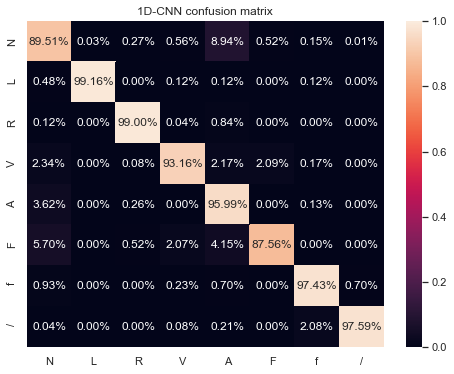

In [15]:
#performance metrics

cnn_predict=np.argmax(cnnpredictions,axis=1)
cnn_actual_value=np.argmax(y_test1,axis=1)
cnn_results = showResults(cnn_actual_value, cnn_predict,'CNN')
from sklearn import metrics
cnnmetrics = metrics.classification_report(cnn_actual_value, cnn_predict, digits=3)
print(cnnmetrics, 'CNN metrics')
categories=['N','L','R','V','A','F','f','/']
plt.figure(figsize=(8,6))
CNN_cf_m = cnn_results[5].astype('float')/ cnn_results[5].sum(axis=1)[:,np.newaxis]
sns.heatmap(np.nan_to_num(CNN_cf_m),annot=True,fmt='.2%',xticklabels=categories,yticklabels=categories,vmin=0,vmax=1)
plt.title('1D-CNN confusion matrix')
plt.show()

# Interpretability 

In [16]:
#Done on LAYER WEIGHTS

from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return
a = last_conv1_cnn
new_last_conv1 = []

for i in range(len(last_conv1_cnn)):
  means = list(means_of_slices(a[i], 20))
  new_last_conv1.append(means)
new_last_conv1 = np.array(new_last_conv1)
print(new_last_conv1.shape)

final_last_conv1 = []
for i in new_last_conv1:
  final_last_conv1.append(np.repeat(i,20))
final_last_conv1 = np.array(final_last_conv1)
print(final_last_conv1.shape)

(37863, 11)
(37863, 220)


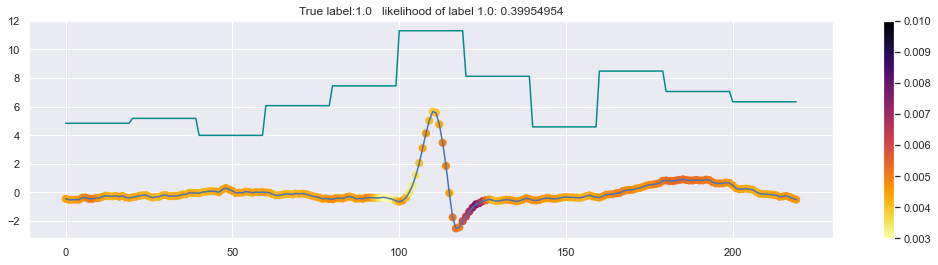

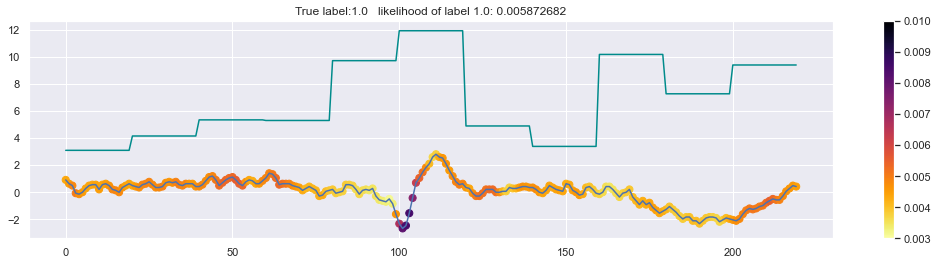

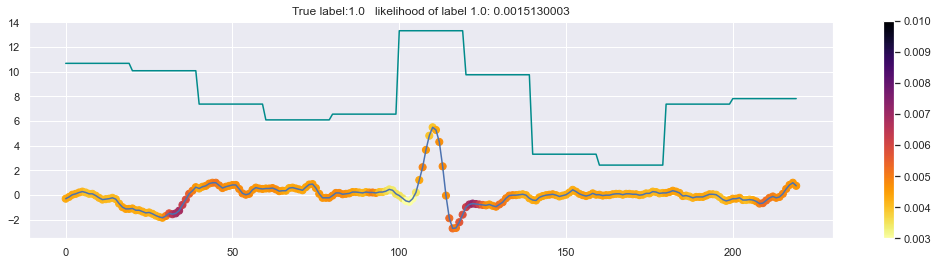

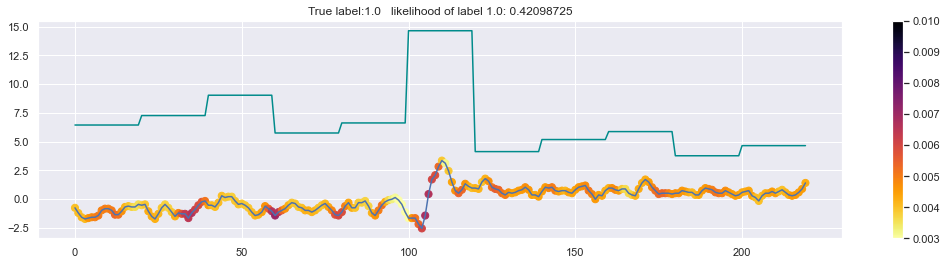

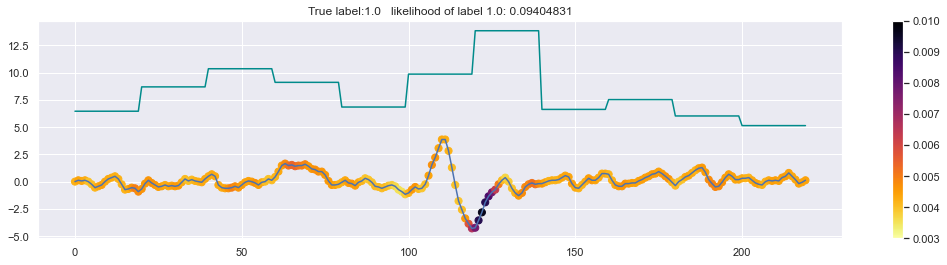

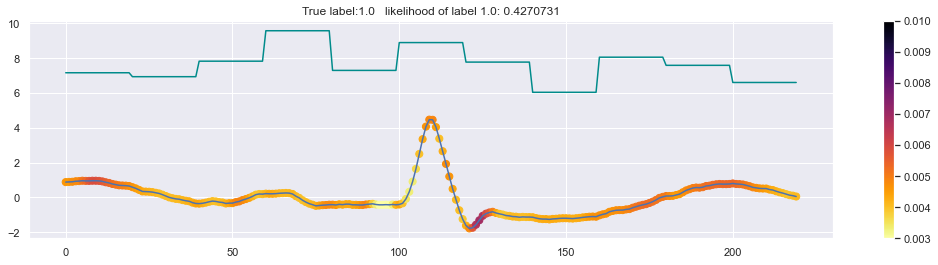

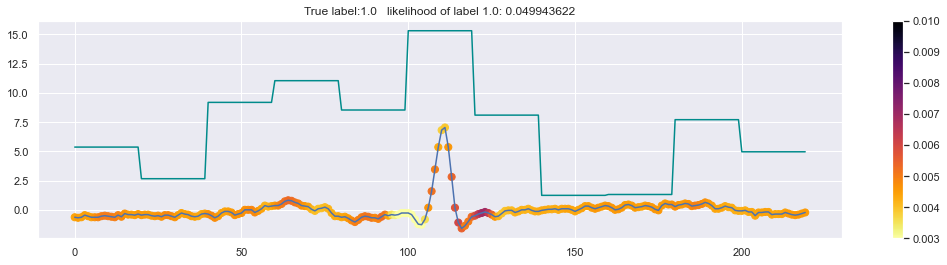

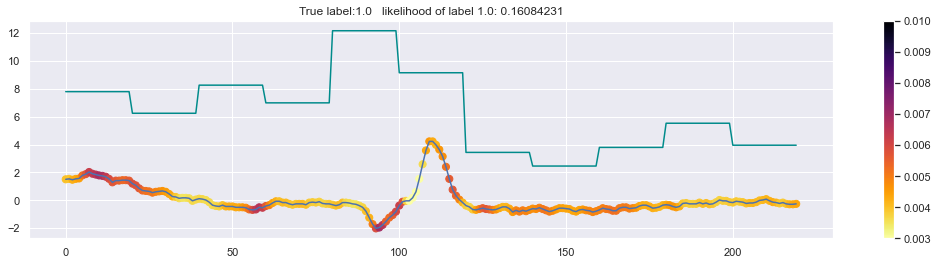

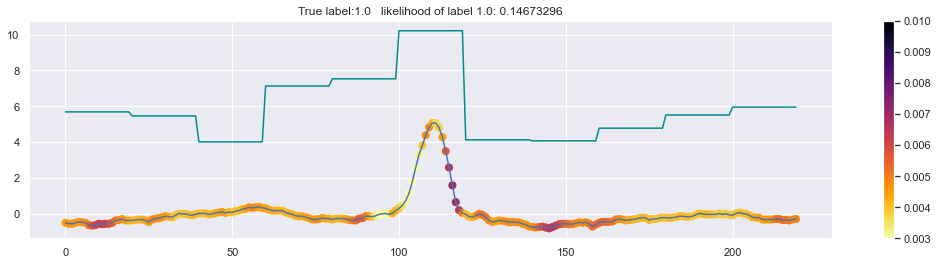

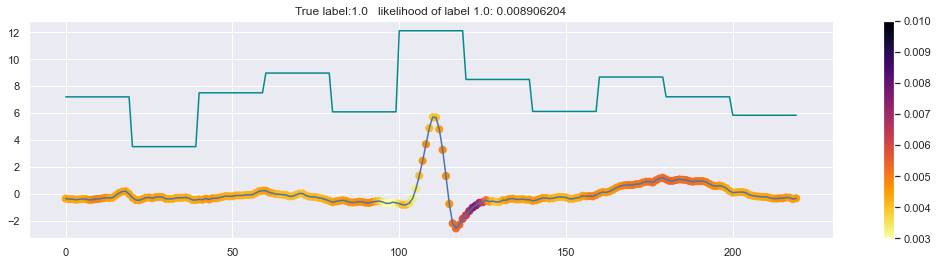

In [17]:
#misclassified saliency
misclass_cnn = np.where(cnn_predict!=cnn_actual_value)
misclass_cnn = misclass_cnn[0].tolist()

for i in misclass_cnn[:10]:
  CAM = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))
  c = np.exp(CAM) / np.sum(np.exp(CAM), axis=1, keepdims=True)
  plt.figure(figsize=(18, 4))
  plt.plot(X_test1[i].squeeze())
  plt.scatter(np.arange(len(X_test1[i])), X_test1[i].squeeze(), cmap='inferno_r', c=c[i,:].squeeze(), s=50)
  plt.plot(final_last_conv1[i], color = 'darkcyan')
  # plt.title('True label:' + str(N_test[i,-2]) + '   likelihood of label ' + str(N_test[i,-2]) + ': ' + str(softmax1_cnn[i][int(y_test[i])]))
  plt.title('True label:' + str(y_test[i]) + '   likelihood of label ' + str(y_test[i]) + ': ' + str(softmax1_cnn[i][int(y_test[i])]))
  plt.clim(0.003,0.010)
  plt.colorbar()
  plt.show

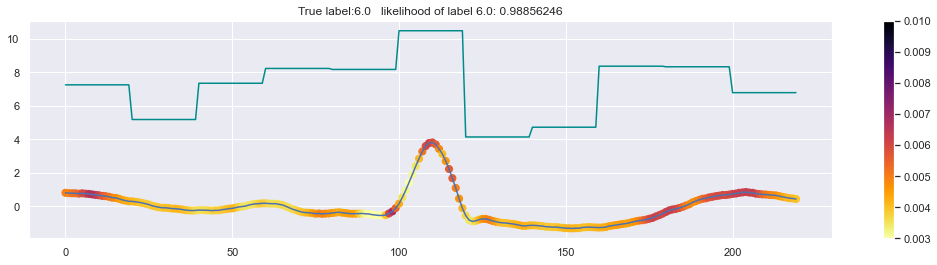

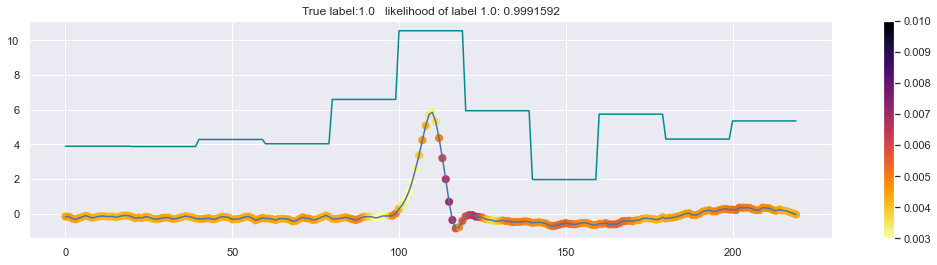

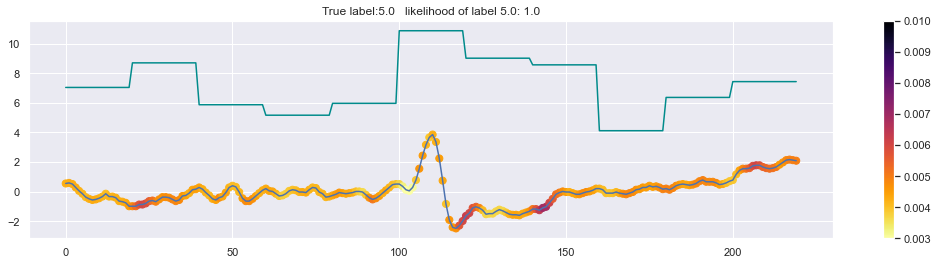

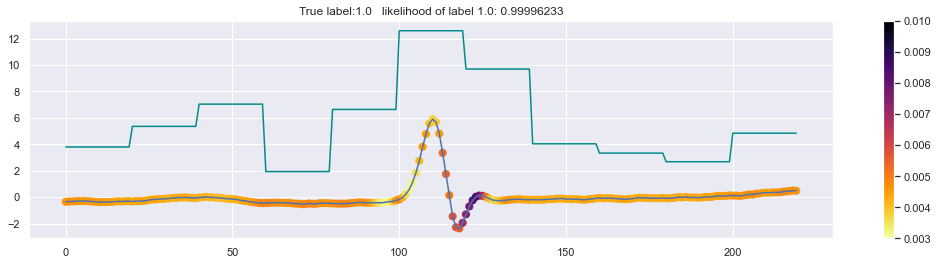

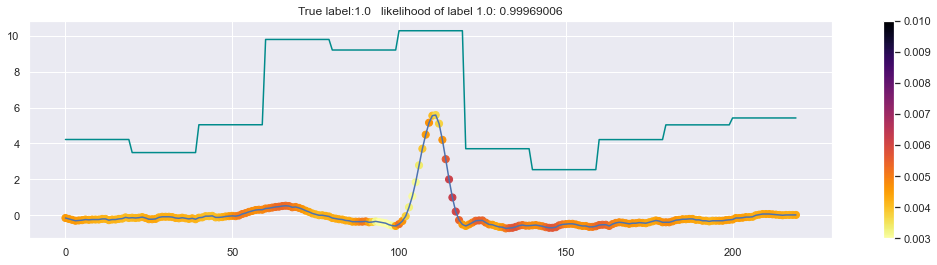

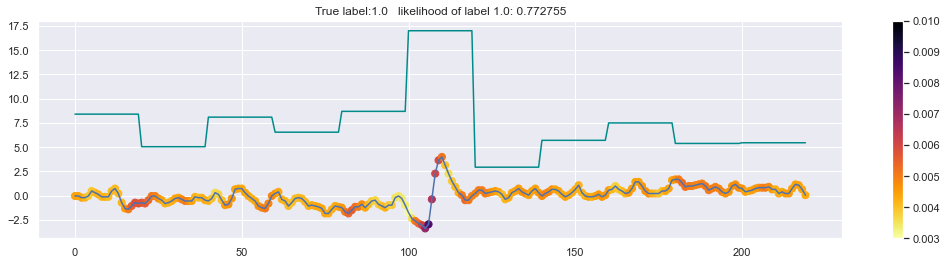

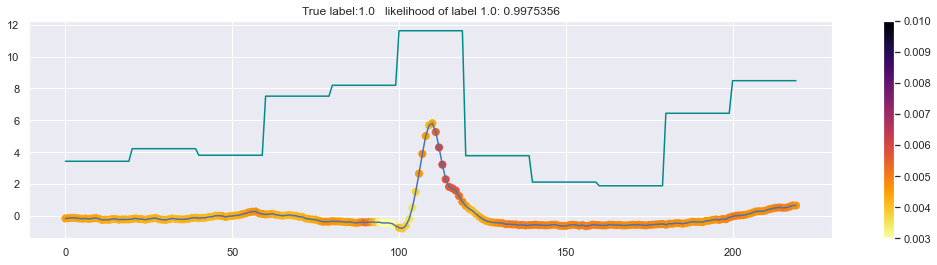

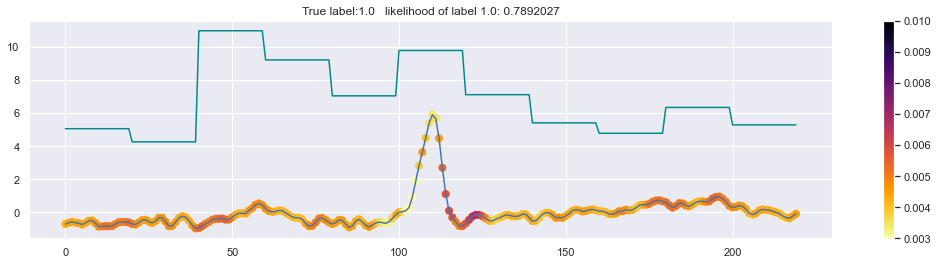

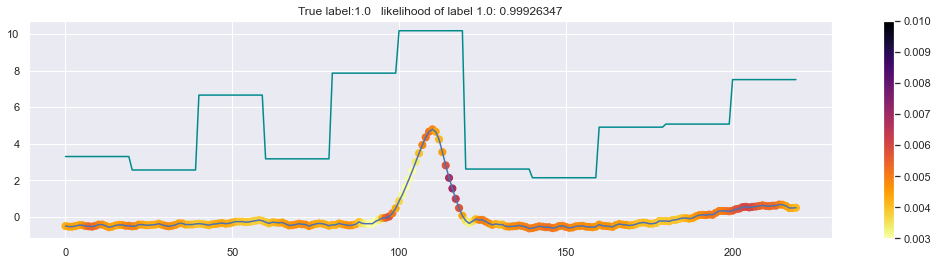

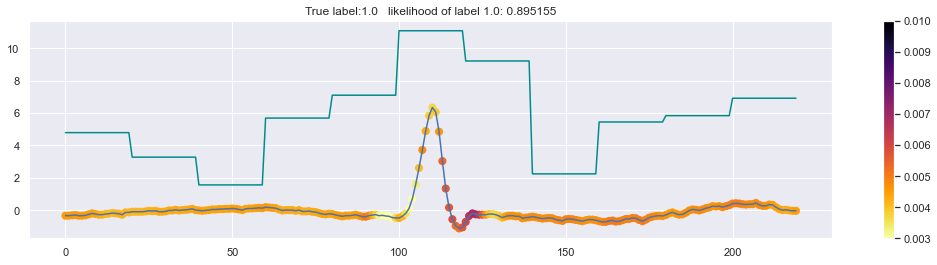

In [18]:
#correct saliency
correct_cnn = np.where(cnn_predict==cnn_actual_value)
correct_cnn = correct_cnn[0].tolist()

for i in correct_cnn[:10]:
  CAM = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))
  c = np.exp(CAM) / np.sum(np.exp(CAM), axis=1, keepdims=True)
  plt.figure(figsize=(18, 4))
  plt.plot(X_test1[i].squeeze())
  plt.scatter(np.arange(len(X_test1[i])), X_test1[i].squeeze(), cmap='inferno_r', c=c[i,:].squeeze(), s=50)
  plt.plot(final_last_conv1[i], color = 'darkcyan')
  # plt.title('True label:' + str(N_test[i,-2]) + '   likelihood of label ' + str(N_test[i,-2]) + ': ' + str(softmax1_cnn[i][int(y_test[i])]))
  plt.title('True label:' + str(y_test[i]) + '   likelihood of label ' + str(y_test[i]) + ': ' + str(softmax1_cnn[i][int(y_test[i])]))
  plt.clim(0.003,0.010)
  plt.colorbar()
  plt.show

In [19]:
#permutation feature weights

# import eli5
# from eli5 import format_as_image
# from eli5.sklearn import PermutationImportance
# from sklearn.neural_network import MLPClassifier
# NNMLP_clf = MLPClassifier(random_state=48, max_iter=50)
# NNMLP_clf.fit(new_last_conv1, y_test1[:])

# perm_all = PermutationImportance(NNMLP_clf).fit(new_last_conv1, y_test1)
# print('CNN results')
# exp = eli5.explain_weights_df(perm_all, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

In [20]:
# perm_corr = PermutationImportance(NNMLP_clf).fit(new_last_conv1[correct_cnn[:]], y_test1[[correct_cnn[:]]])
# print('CNN Correct results')
# exp_corr = eli5.explain_weights_df(perm_corr, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

In [21]:
# perm_mis = PermutationImportance(NNMLP_clf).fit(new_last_conv1[misclass_cnn[:]], y_test1[misclass_cnn[:]])
# print('CNN Misclass results')
# exp_mis = eli5.explain_weights_df(perm_mis, feature_names = [0,1,2,3,4,5,6,7,8,9,10])

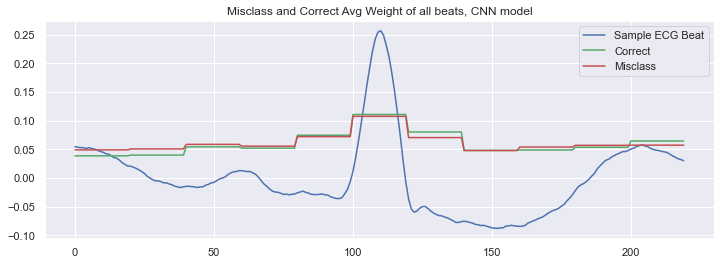

In [22]:
from sklearn.preprocessing import normalize

n0= normalize(final_last_conv1[correct_cnn[:]])
n1= normalize(final_last_conv1[misclass_cnn[:]])
n2= normalize(X_test1[:,:,0,0])

m0=n0.mean(axis=0)
m1=n1.mean(axis=0)

plt.figure(figsize=(12,4))
plt.plot(n2[0],color='b',label='Sample ECG Beat')
plt.plot(np.abs(m0),color='g',label='Correct')
plt.plot(np.abs(m1),color='r',label='Misclass')
# plt.title('Class: N, Number: ' + str(class_num))
# plt.title('Misclass and Correct Avg Weight of F class, CNN model')
# plt.title('Misclass and Correct Avg Weight of F class on 0.25 std Noise, CNN model')
plt.title('Misclass and Correct Avg Weight of all beats, CNN model')
plt.legend()
plt.show()

In [23]:
# saving the model

model_json = cnnmodel.to_json()
with open("cnnmodel_weights.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnnmodel.save_weights("cnnmodel_weights.h5")
cnnmodel.save("cnnmodel.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
#done on GRAD-CAM

from itertools import islice
def means_of_slices(iterable, slice_size):
    iterator = iter(iterable)
    while True:
        slice = list(islice(iterator, slice_size))
        if slice:
            yield np.sum(slice)/len(slice)
        else:
            return

a = np.dot(last_conv1_cnn, softmax_weight_cnn)
new_last_conv1 = []

for i in range(len(last_conv1_cnn)):
  means = list(means_of_slices(a[i], 20))
  new_last_conv1.append(means)
new_last_conv1 = np.array(new_last_conv1)
print(new_last_conv1.shape)

final_last_conv1 = []
for i in new_last_conv1:
  final_last_conv1.append(np.repeat(i,20))
final_last_conv1 = np.array(final_last_conv1)
print(final_last_conv1.shape)

(37863, 11)
(37863, 220)


In [25]:
# exp = exp.sort_values(by=['feature'])
# exp_corr = exp_corr.sort_values(by=['feature'])
# exp_mis = exp_mis.sort_values(by=['feature'])

# exp.to_csv('cnn_pfi.csv', encoding='utf-8', index=False)
# exp_corr.to_csv('cnn_pfi_corr.csv', encoding='utf-8', index=False)
# exp_mis.to_csv('cnn_pfi_mis.csv', encoding='utf-8', index=False)

# cnn_pfi = exp.weight.values
# cnn_pfi

In [26]:
# cnn_pfi = pd.read_csv('./drive/MyDrive/compsci/leave_pfi/cnn_pfi.csv')
# # cnn_pfi = pd.read_csv('./drive/MyDrive/compsci/pfi/cnn_pfi.csv')

# cnn_pfi = cnn_pfi.weight.values

In [27]:
# cnn_pfi = normalize(cnn_pfi.reshape(1,-1))
# cnn_pfi = cnn_pfi.ravel()

# cnn_grad_corr = normalize(new_last_conv1[correct_cnn[:]])
# cnn_grad_mis = normalize(new_last_conv1[misclass_cnn[:]])

# cnn_grad_corr = np.abs(cnn_grad_corr)
# cnn_grad_mis = np.abs(cnn_grad_mis)

# corr = pd.DataFrame(cnn_grad_corr)
# df_corr = pd.DataFrame({'mean': corr.mean(), 'median': corr.median(),
#                    '25%': corr.quantile(0.25), '50%': corr.quantile(0.5),
#                    '75%': corr.quantile(0.75)})

# mis = pd.DataFrame(cnn_grad_mis)
# df_mis = pd.DataFrame({'mean': mis.mean(), 'median': mis.median(),
#                    '25%': mis.quantile(0.25), '50%': mis.quantile(0.5),
#                    '75%': mis.quantile(0.75)})

# plt.figure(figsize=(12,3))
# plt.plot(cnn_pfi,color='b',label='PFI')
# plt.plot(df_corr['mean'],color='g',label='Correct Grad-CAM')
# plt.fill_between(np.arange(11), df_corr['25%'], df_corr['75%'], alpha=0.1, facecolor="g")
# plt.plot(df_mis['mean'],color='r',label='Misclass Grad-CAM')
# plt.fill_between(np.arange(11), df_mis['25%'], df_mis['75%'], alpha=0.1, facecolor="r")
# plt.title('Mean and 25%-75% Quartile Per Segment, PFI vs Grad-CAM for all Class on CNN ')
# plt.xticks(ticks=(0,1,2,3,4,5,6,7,8,9,10))
# plt.xlabel('Segments')
# plt.legend(loc=2)
# plt.show()

In [28]:
#Use only when running on all data

CNN_results = pd.DataFrame(data=cnn_results,index=('Model','Accuracy','Precision','Recall','F1score','CM'))
print(CNN_results)
CNN_results.to_csv('cnn_results.csv', encoding='utf-8', index=False)

                                                           0
Model                                                    CNN
Accuracy                                               0.914
Precision                                              0.793
Recall                                                 0.949
F1score                                                0.834
CM         [[25693, 10, 77, 162, 2566, 148, 43, 4], [8, 1...
